Perform Principal component analysis and perform clustering using first


3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df



In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# load dataset
data = pd.read_csv("wine (1).csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [4]:
#shows all columns
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
# null count for columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

 no null value and datatype also assign accuratly

In [7]:
# print the duplicated rows
data.duplicated().sum()

0

There is no Duplicated values in data

In [8]:
#it gives best descriptive stats
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


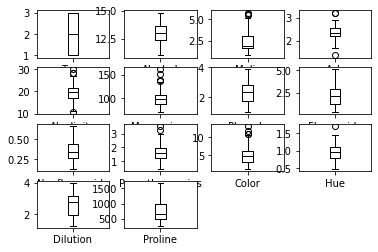

In [9]:
# outliers Treatment
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show();

In [10]:
data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

#plotting  the histogram of each numerical variable to get insights as :
to check feature distribution and also to check outliers

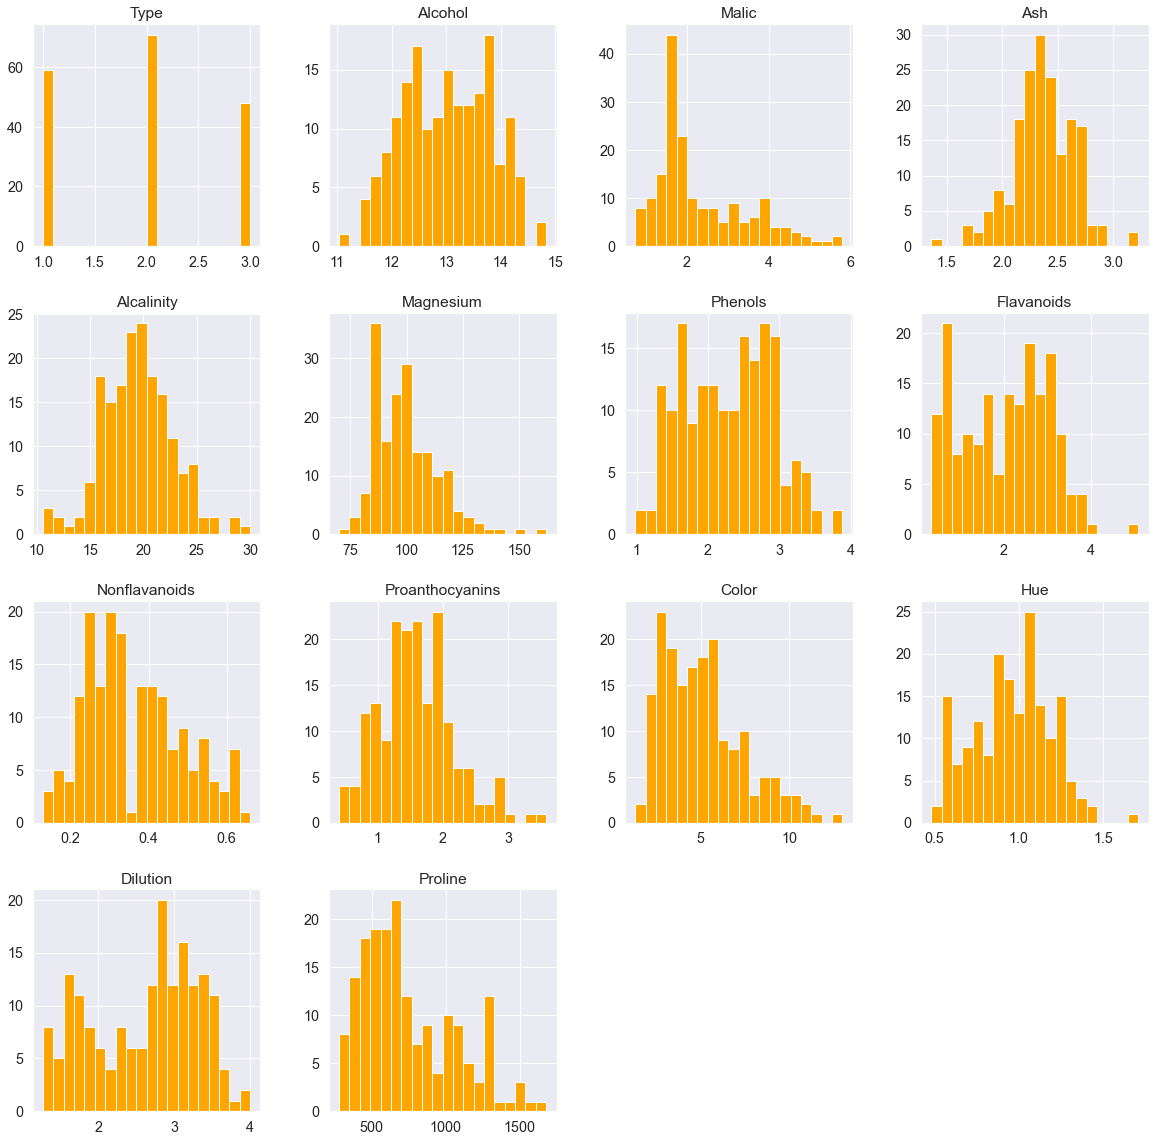

In [12]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='orange' )

magnesium & malic they are highly skew

In [14]:
data.Malic=np.sqrt(data.Malic)

In [15]:
data.Magnesium=np.sqrt(data.Magnesium)

In [16]:
data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              0.674257
Ash               -0.176699
Alcalinity         0.213047
Magnesium          0.838231
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

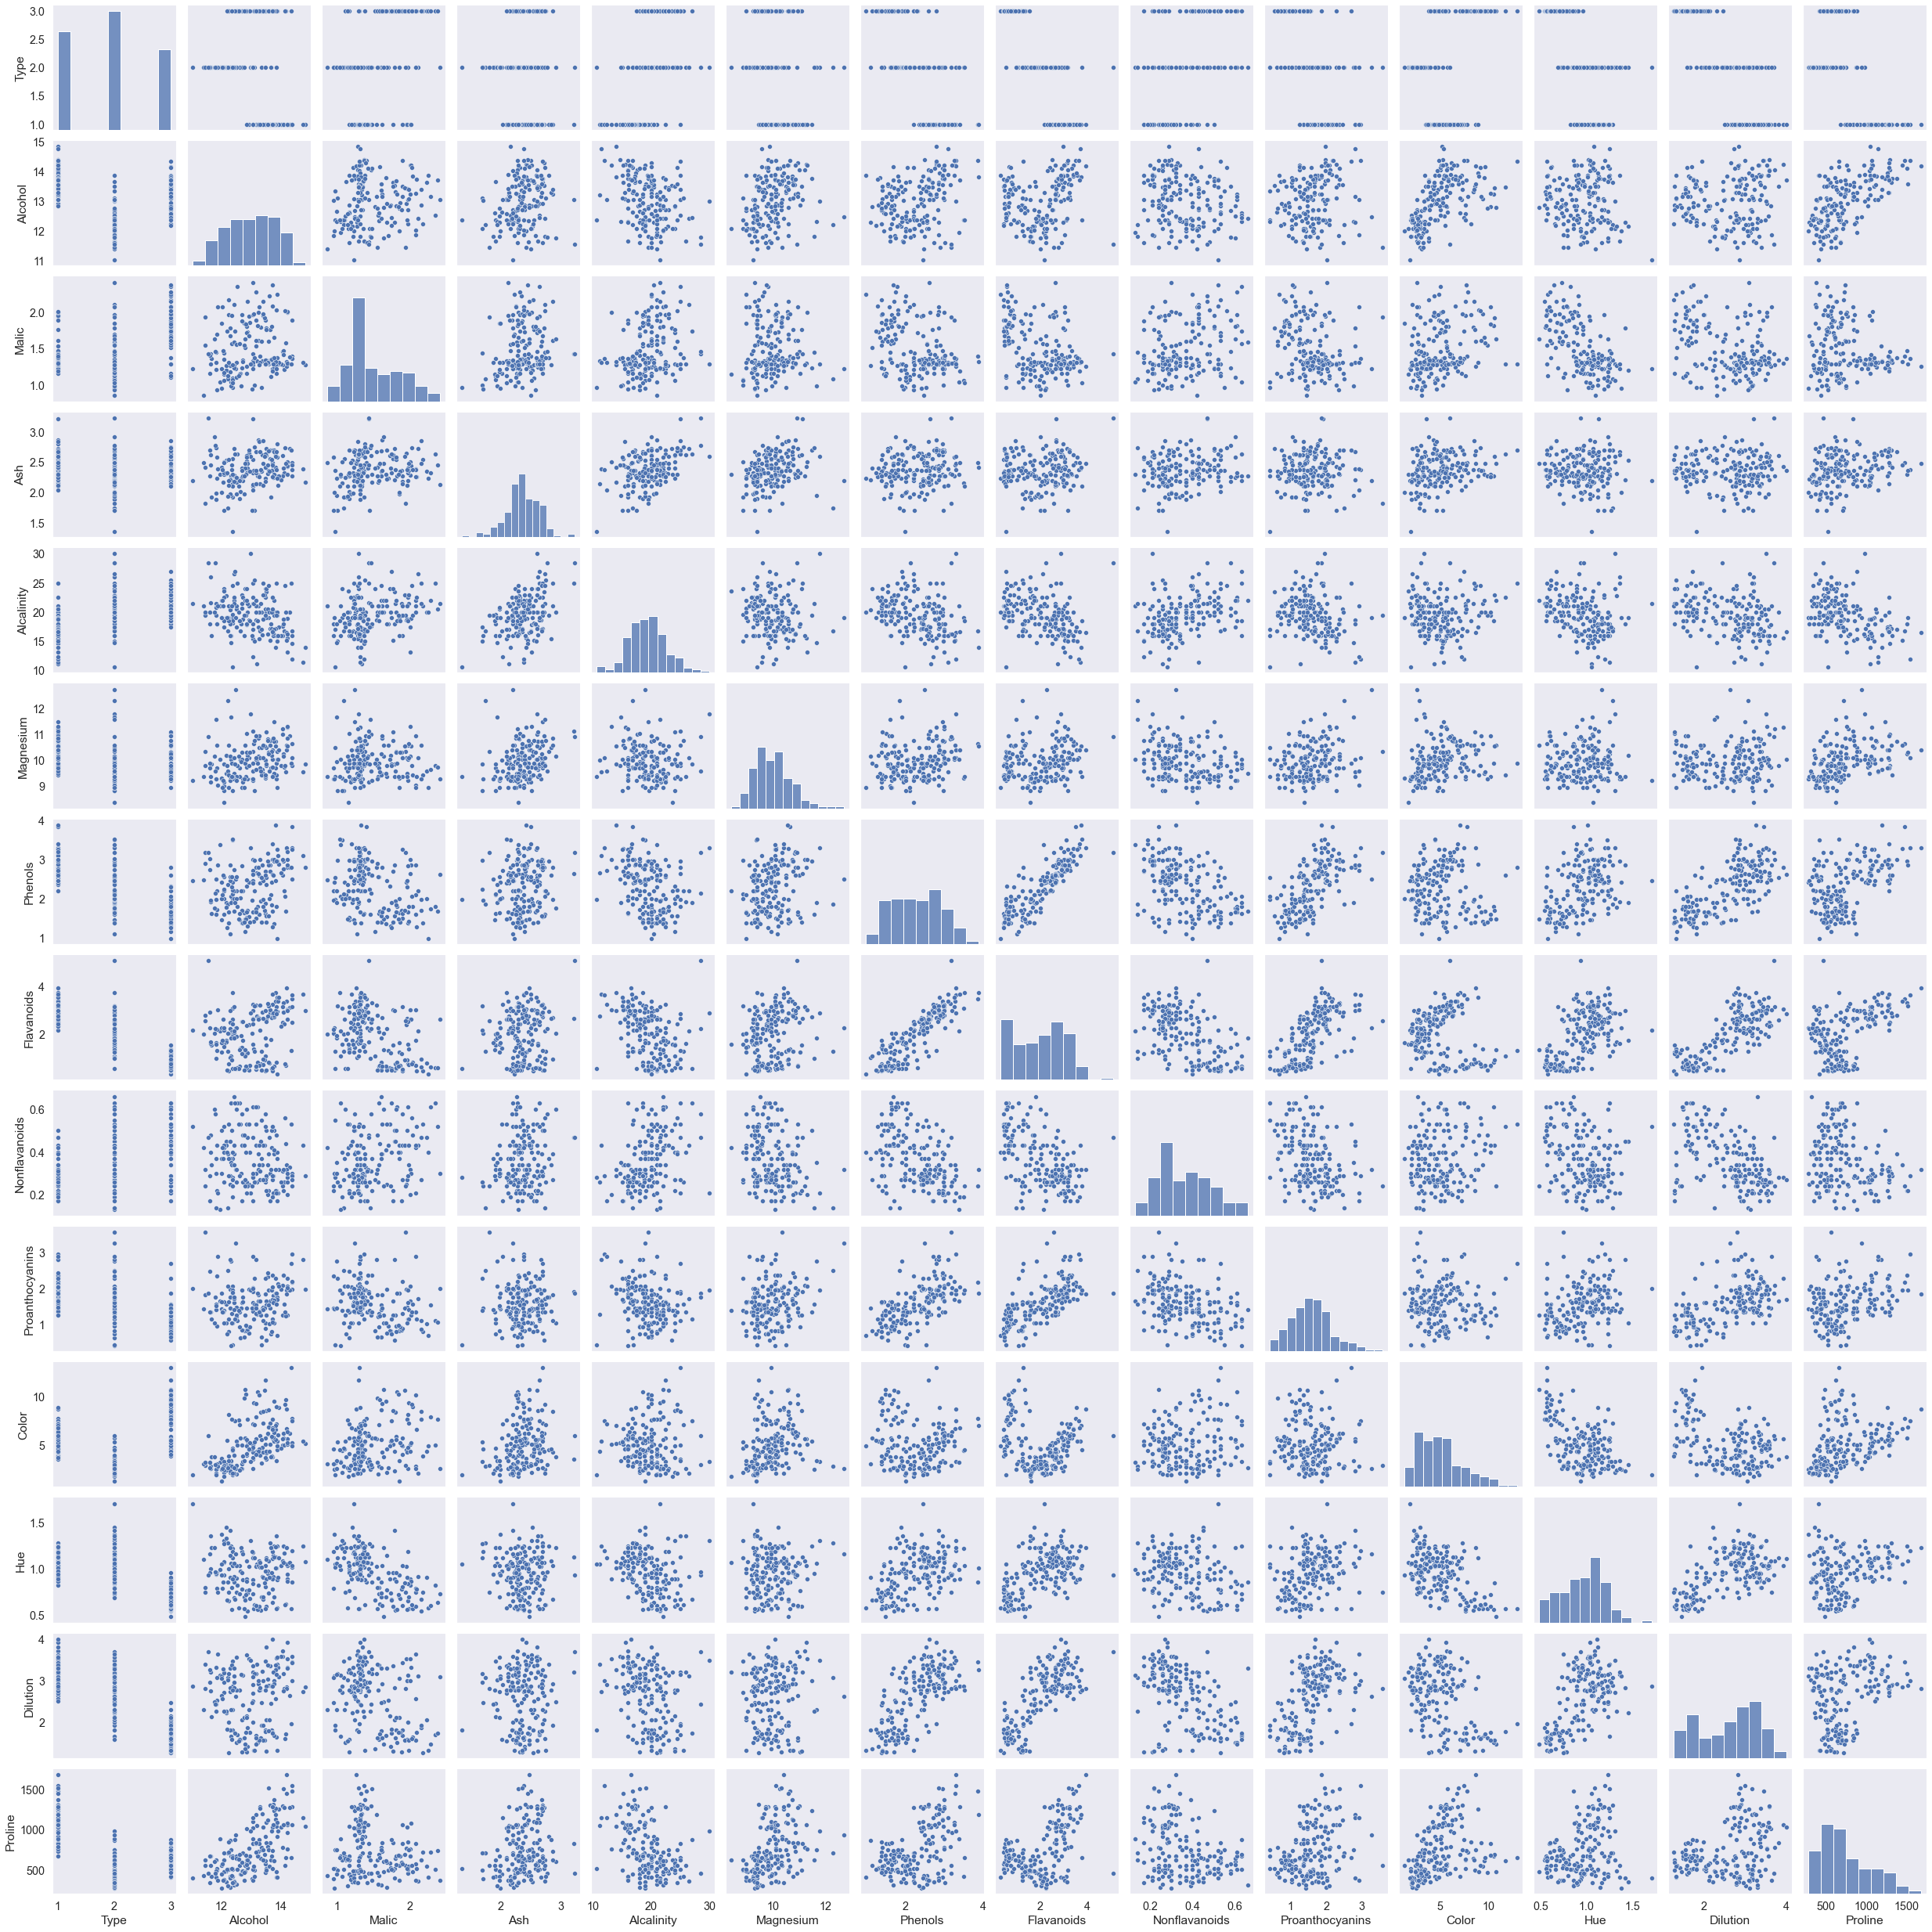

In [17]:
# Visualization
sns.pairplot(data,palette="dark")
plt.show();

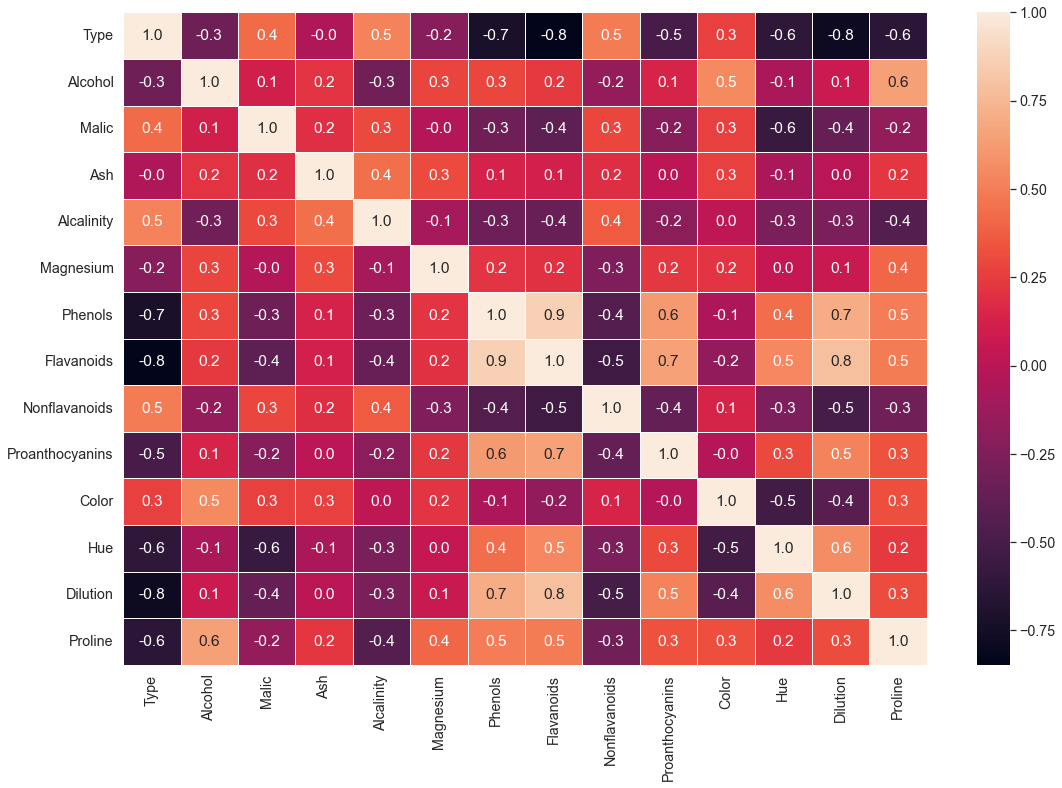

In [18]:
# heatmap
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show();

Unique points in this correlation matrix:

Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
Flavanoids is positively correlated with Proanthocyanins and Dilution
Dilution is positively correlated with Hue
Alcohol is positively correlated with Proline

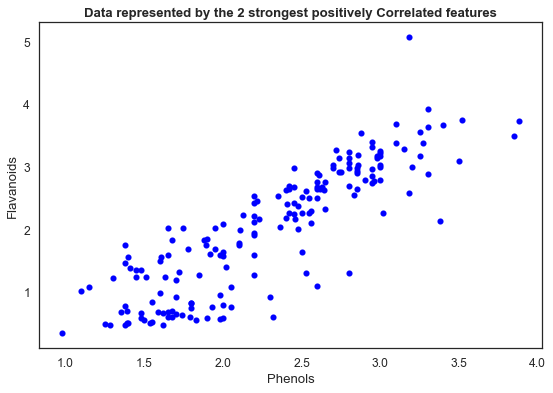

In [21]:
# Plotting frequent flying Phenols vs. Flavanoids  
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=data['Phenols'], y=data['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show();

In [20]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.307670,2.43,15.6,11.269428,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.334166,2.14,11.2,10.000000,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,1.536229,2.67,18.6,10.049876,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.396424,2.50,16.8,10.630146,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,1.609348,2.87,21.0,10.862780,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.376973,2.45,20.5,9.746794,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,1.977372,2.48,23.0,10.099505,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,2.068816,2.26,20.0,10.954451,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,1.609348,2.37,20.0,10.954451,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# PCA

In [22]:
# importing libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [23]:
# separating target column
Type=data.Type
Type


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [24]:
# now lets work on features
data1=data.iloc[:,1:]
data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.307670,2.43,15.6,11.269428,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.334166,2.14,11.2,10.000000,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,1.536229,2.67,18.6,10.049876,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.396424,2.50,16.8,10.630146,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,1.609348,2.87,21.0,10.862780,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,2.376973,2.45,20.5,9.746794,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,1.977372,2.48,23.0,10.099505,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,2.068816,2.26,20.0,10.954451,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,1.609348,2.37,20.0,10.954451,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [25]:
# Normalizing the numerical data 
data1 = scale(data1)
data1


array([[ 1.51861254, -0.52594693,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.44912913, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.13667975,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.68072569, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.3486609 ,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.55324915,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [26]:
#using PCA function to train model

In [27]:
pca = PCA()
pca_values = pca.fit_transform(data1)

In [28]:
pca.components_     

array([[ 1.44157060e-01, -2.40301009e-01, -3.54989485e-03,
        -2.40438498e-01,  1.41301889e-01,  3.95600000e-01,
         4.23351445e-01, -2.99131815e-01,  3.13659751e-01,
        -8.96147057e-02,  2.97357831e-01,  3.76409833e-01,
         2.86286124e-01],
       [-4.77707360e-01, -2.44787333e-01, -3.18678052e-01,
         7.70676384e-03, -3.12448966e-01, -6.60360129e-02,
         3.73504584e-04, -2.71559645e-02, -3.97123168e-02,
        -5.22826569e-01,  2.76080908e-01,  1.59153887e-01,
        -3.62024490e-01],
       [-2.12616398e-01,  1.07761364e-01,  6.20183016e-01,
         6.09284056e-01,  1.21129139e-01,  1.48012459e-01,
         1.54339357e-01,  1.66710088e-01,  1.50709351e-01,
        -1.46520449e-01,  8.72733107e-02,  1.73532509e-01,
        -1.31237047e-01],
       [-3.36703498e-02,  5.15559189e-01, -2.33889338e-01,
         6.01435239e-02, -3.26021183e-01,  1.79411975e-01,
         1.43080485e-01, -2.30713261e-01,  4.09414564e-01,
         7.13678495e-02, -4.46832388e

In [29]:
#pcs score
pca_values

array([[ 3.30216995e+00, -1.45614458e+00, -1.83568517e-01, ...,
        -4.72735485e-01,  5.71438361e-01, -6.57899309e-02],
       [ 2.20547524e+00,  3.20136706e-01, -2.00199994e+00, ...,
        -1.44899140e-01,  3.92674805e-01, -1.01470347e-04],
       [ 2.49439987e+00, -1.07885502e+00,  1.00058026e+00, ...,
        -2.93282795e-01, -1.61190913e-03,  2.35287847e-02],
       ...,
       [-2.65937430e+00, -2.76172256e+00, -9.73572631e-01, ...,
         5.24689458e-01,  6.72186330e-01,  5.25670502e-02],
       [-2.42092086e+00, -2.31728564e+00, -5.91939953e-01, ...,
         2.95957405e-01,  3.69847602e-01, -1.79334796e-02],
       [-3.19889700e+00, -2.76650159e+00,  9.86690233e-01, ...,
        -2.24916486e-01, -1.97284526e-01, -3.24504347e-01]])

In [30]:
# Creating a dataframe featuring the all Principal components that we acquired through PCA.
PCA_dataset = pd.DataFrame(data = pca_values, columns = ['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'] )
PCA_dataset.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,3.302170,-1.456145,-0.183569,-0.169738,0.643306,-0.207284,0.596426,0.047367,0.644993,-0.987731,-0.472735,0.571438,-0.065790
1,2.205475,0.320137,-2.002000,-0.274710,-0.187697,-0.994995,0.111291,1.008794,-0.335200,-0.128261,-0.144899,0.392675,-0.000101
2,2.494400,-1.078855,1.000580,0.738799,-0.282777,0.494126,0.482989,-0.382475,-1.154368,-0.070571,-0.293283,-0.001612,0.023529
3,3.741707,-2.777723,-0.187586,0.560700,-0.340861,0.098449,-0.381100,0.647252,0.018697,-0.277866,0.744082,-0.243782,-0.366587
4,0.980570,-0.938010,2.030383,-0.399034,0.328854,-0.408784,0.472312,0.408962,0.335962,0.108470,-0.512980,-0.210010,-0.078845


In [31]:
# variance of each PCA explains is 
var = pca.explained_variance_ratio_
var


array([0.36122562, 0.19502299, 0.11149233, 0.07004049, 0.06448017,
       0.04959148, 0.04174194, 0.0269469 , 0.02219485, 0.01881893,
       0.01734139, 0.0131273 , 0.0079756 ])

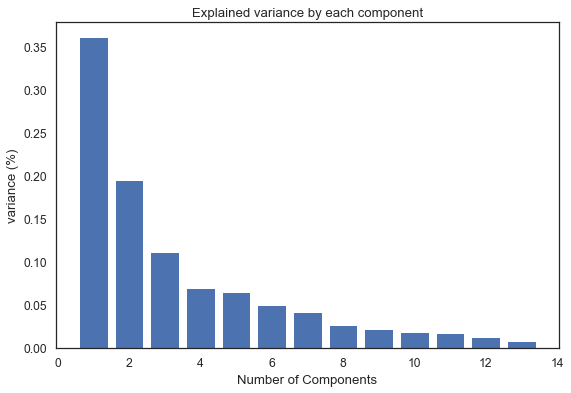

In [32]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')
plt.show();

In [33]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.12, 55.62, 66.77, 73.77, 80.22, 85.18, 89.35, 92.04, 94.26,
       96.14, 97.87, 99.18, 99.98])

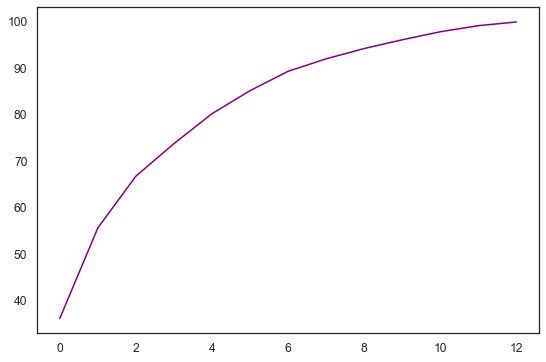

In [34]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="purple")

#problems suggest as use first 3 components and so extracting the three features from pca dataset

In [36]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']

In [37]:
# Create dataframe for further clusering algorithms
pca_df = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_df.head()

,component1,component2,component3
0,3.302170,-1.456145,-0.183569
1,2.205475,0.320137,-2.002000
2,2.494400,-1.078855,1.000580
3,3.741707,-2.777723,-0.187586
4,0.980570,-0.938010,2.030383


# Hierarchical Agglomerative Clustering

In [39]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
H_clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=3)

In [40]:
H_clu=H_clusters.fit_predict(pca_df)
Hie=pd.DataFrame(H_clu,columns=['clustersid_H'])
Hie

,clustersid_H
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [41]:
Hie['clustersid_H'].value_counts()

0    65
2    61
1    52
Name: clustersid_H, dtype: int64

In [42]:
#checking silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(pca_df,H_clu)

0.45273465235925653

# K-MEANS Clustering

C:\Users\sarve\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


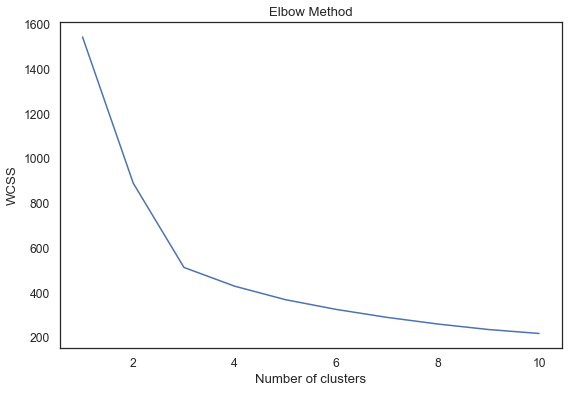

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
wcss

[1545.1525485615143,
 891.5355048151567,
 514.9464307856301,
 431.1684404683429,
 370.93443532473185,
 327.4213745671104,
 291.8953935236311,
 262.1934566061433,
 237.5764006768433,
 219.83892197352856]

In [45]:
#Build Cluster algorithm

KM_clusters = KMeans(3, random_state=42)
K_mean=KM_clusters.fit_predict(pca_df)
kmean=pd.DataFrame(K_mean,columns=['clusterid_Kmeans'])
kmean

,clusterid_Kmeans
0,1
1,1
2,1
3,1
4,1
...,...
173,0
174,0
175,0
176,0


In [46]:
kmean['clusterid_Kmeans'].value_counts()

2    65
1    62
0    51
Name: clusterid_Kmeans, dtype: int64

In [47]:
#checking silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(pca_df,K_mean )

0.45565997441382444

Preparing Actual Vs. Predicted Clusering Data

In [48]:
pd.set_option('display.max_rows',None)
pred_df = pd.concat([Type, Hie, kmean],axis = 1)
pred_df

,Type,clustersid_H,clusterid_Kmeans
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
5,1,0,1
6,1,0,1
7,1,0,1
8,1,0,1
9,1,0,1


In [49]:
# nearly 90% is predicted accuratly by hierarchical and kmean clustering
